In [ ]:
# DATA LOADING AND INITIAL EXPLORATION

In [1]:
# Import all libraries that are essential for this analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import pearsonr, spearmanr

#ignore warnings (if any)
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Working Directory 
import os
print("Current working directory:", os.getcwd())

Current working directory: /Users/anvitharayala/Documents/Python Work


In [27]:
# Loading the Dataset
df = pd.read_csv(" Social Media Analysis.csv")
df.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [28]:
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [29]:
#sample of the dataset
df.sample()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
366,367,20,Female,Undergraduate,USA,7.2,TikTok,Yes,5.1,5,In Relationship,4,9


In [30]:
#First 5 entries
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [31]:
#Last 5 entries
df.tail()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


In [32]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [33]:
#all intial columns present in the dataset
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [34]:
#No. of rows and Columns in the given dataset
df.shape

(705, 13)

In [35]:
#Range Index of the dataset
df.index

RangeIndex(start=0, stop=705, step=1)

In [36]:
#datatypes of all the columns present in the dataset
df.dtypes

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

In [37]:
#describing data as a whole including all essential parameters 
df.describe(include='all')

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705,705,705,705.000000,705,705,705.000000,705.000000,705,705.000000,705.000000
unique,NaN,NaN,2,3,110,NaN,12,2,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Female,Undergraduate,India,NaN,Instagram,Yes,NaN,NaN,Single,NaN,NaN
freq,NaN,NaN,353,353,53,NaN,249,453,NaN,NaN,384,NaN,NaN
mean,353.000000,20.659574,NaN,NaN,NaN,4.918723,NaN,NaN,6.868936,6.226950,NaN,2.849645,6.436879
std,203.660256,1.399217,NaN,NaN,NaN,1.257395,NaN,NaN,1.126848,1.105055,NaN,0.957968,1.587165
min,1.000000,18.000000,NaN,NaN,NaN,1.500000,NaN,NaN,3.800000,4.000000,NaN,0.000000,2.000000
25%,177.000000,19.000000,NaN,NaN,NaN,4.100000,NaN,NaN,6.000000,5.000000,NaN,2.000000,5.000000
50%,353.000000,21.000000,NaN,NaN,NaN,4.800000,NaN,NaN,6.900000,6.000000,NaN,3.000000,7.000000
75%,529.000000,22.000000,NaN,NaN,NaN,5.800000,NaN,NaN,7.700000,7.000000,NaN,4.000000,8.000000


In [ ]:
# DATA CLEANING AND PREPROCESSING

In [38]:
#checking null items (if any)
df.isnull().any()

Student_ID                      False
Age                             False
Gender                          False
Academic_Level                  False
Country                         False
Avg_Daily_Usage_Hours           False
Most_Used_Platform              False
Affects_Academic_Performance    False
Sleep_Hours_Per_Night           False
Mental_Health_Score             False
Relationship_Status             False
Conflicts_Over_Social_Media     False
Addicted_Score                  False
dtype: bool

In [39]:
##summation of null items (if any)
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [40]:
#detecting unique entries from each column
df.nunique()

Student_ID                      705
Age                               7
Gender                            2
Academic_Level                    3
Country                         110
Avg_Daily_Usage_Hours            67
Most_Used_Platform               12
Affects_Academic_Performance      2
Sleep_Hours_Per_Night            59
Mental_Health_Score               6
Relationship_Status               3
Conflicts_Over_Social_Media       6
Addicted_Score                    8
dtype: int64

In [41]:
#checking for duplicates
df.duplicated().sum()

0

In [42]:
#memory footprint
df.memory_usage(deep=True)

Index                             132
Student_ID                       5640
Age                              5640
Gender                          43711
Academic_Level                  47671
Country                         44800
Avg_Daily_Usage_Hours            5640
Most_Used_Platform              45672
Affects_Academic_Performance    42048
Sleep_Hours_Per_Night            5640
Mental_Health_Score              5640
Relationship_Status             47176
Conflicts_Over_Social_Media      5640
Addicted_Score                   5640
dtype: int64

In [ ]:
# EXPLORATORY DATA ANALYSIS WITH DATA VISUALIZATION

In [47]:
#dropping unnecessary columns
df2 = df.drop(columns=['Student_ID'])

In [49]:
df2.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


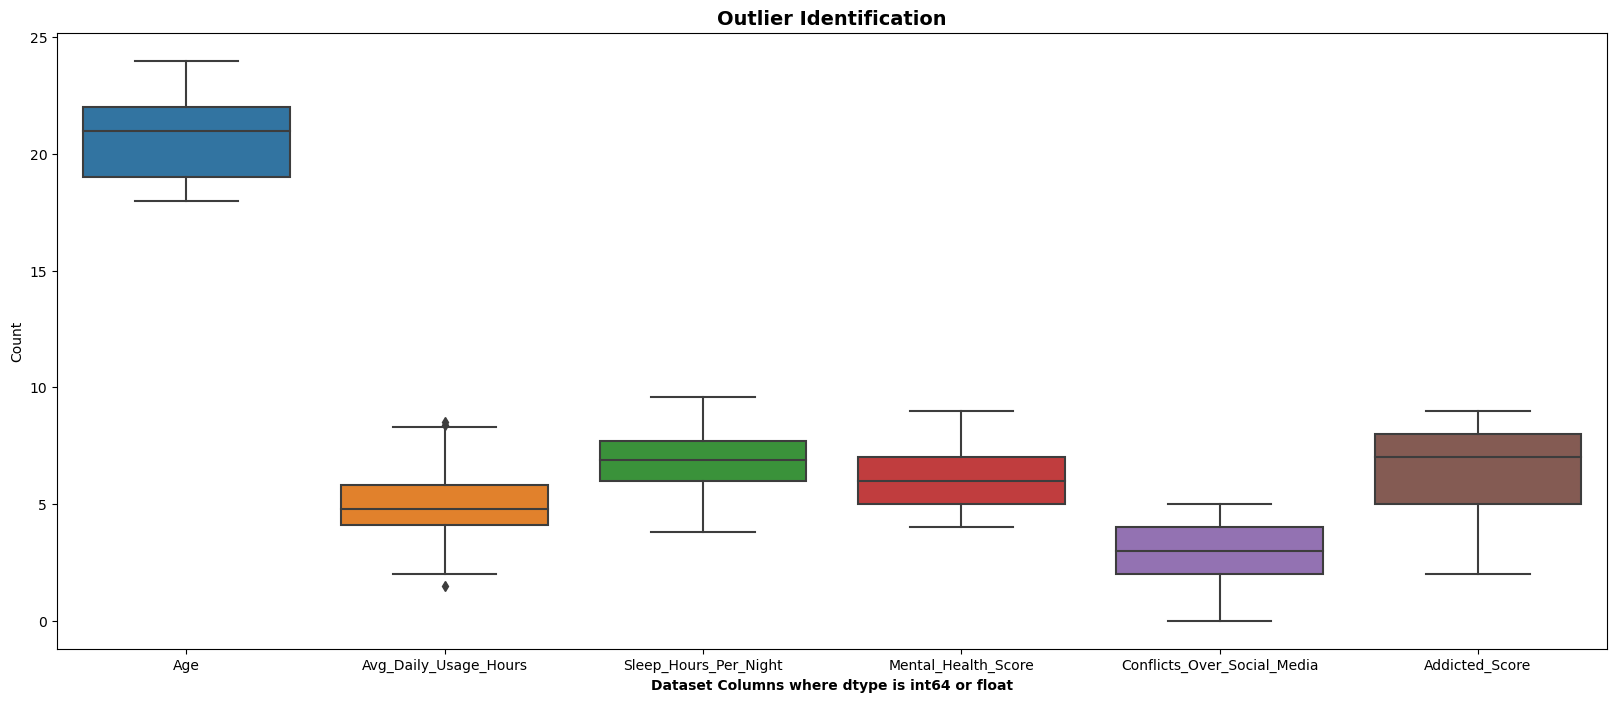

In [48]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df2)
plt.title('Outlier Identification',fontsize=14, fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Dataset Columns where dtype is int64 or float', fontweight='bold')
plt.show()

In [50]:
#using IQR method to cap it

Q1 = df2['Avg_Daily_Usage_Hours'].quantile(0.25)
Q3 = df2['Avg_Daily_Usage_Hours'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2['Avg_Daily_Usage_Hours'] = np.where(df2['Avg_Daily_Usage_Hours'] > upper_bound, upper_bound,np.where(df2['Avg_Daily_Usage_Hours'] < lower_bound, lower_bound, df2['Avg_Daily_Usage_Hours']))

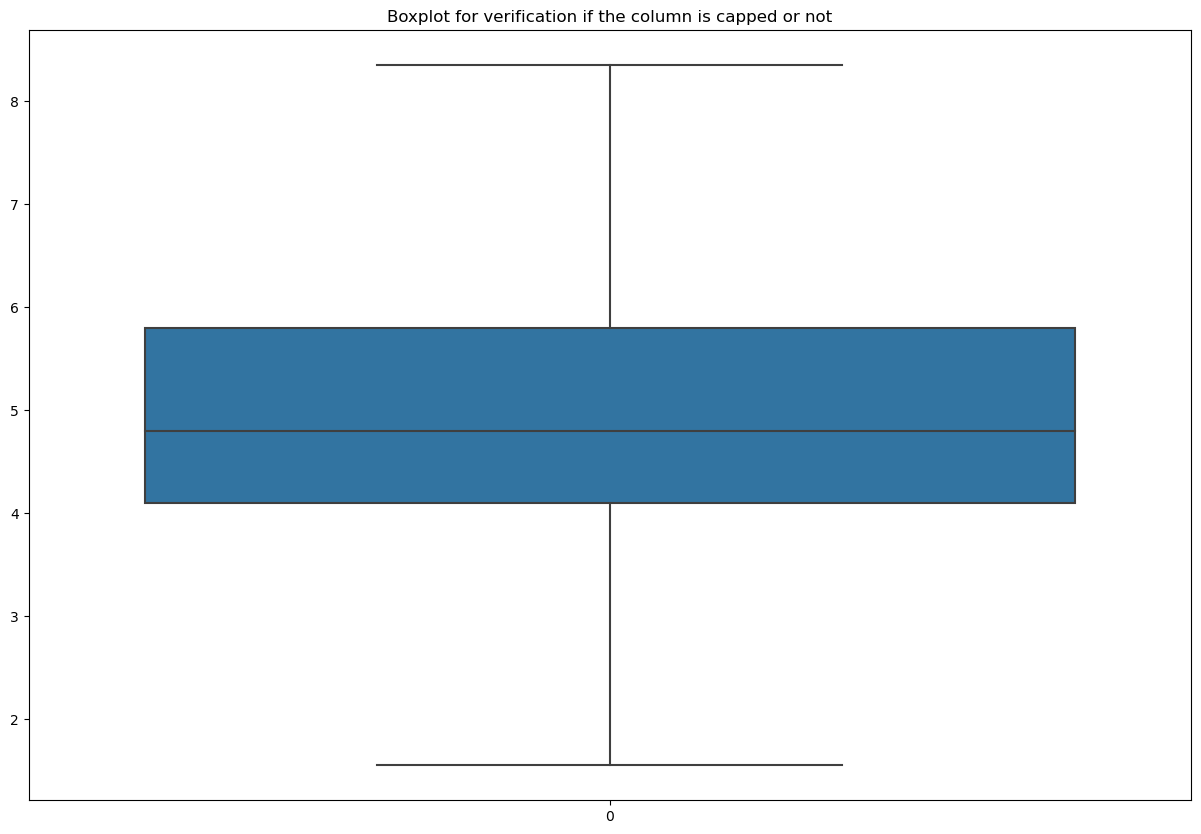

In [51]:
#re-verification of the column "Avg_Daily_Usage_Hours" if it is capped or not

plt.figure(figsize=(15,10))
sns.boxplot(data=df2['Avg_Daily_Usage_Hours'])
plt.title('Boxplot for verification if the column is capped or not')
plt.show()

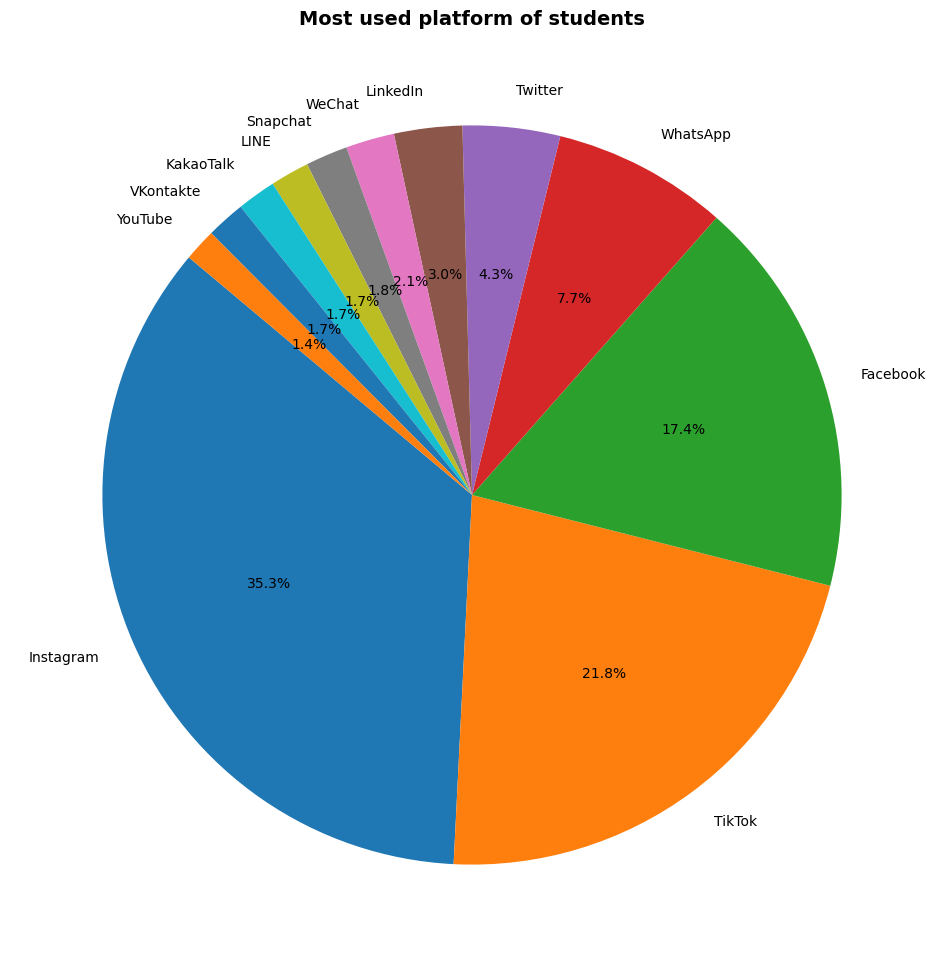

In [52]:
#platforms on which students addicted
counts = df2['Most_Used_Platform'].value_counts()

plt.figure(figsize=(12, 12))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Most used platform of students',fontsize=14, fontweight='bold')
plt.show()

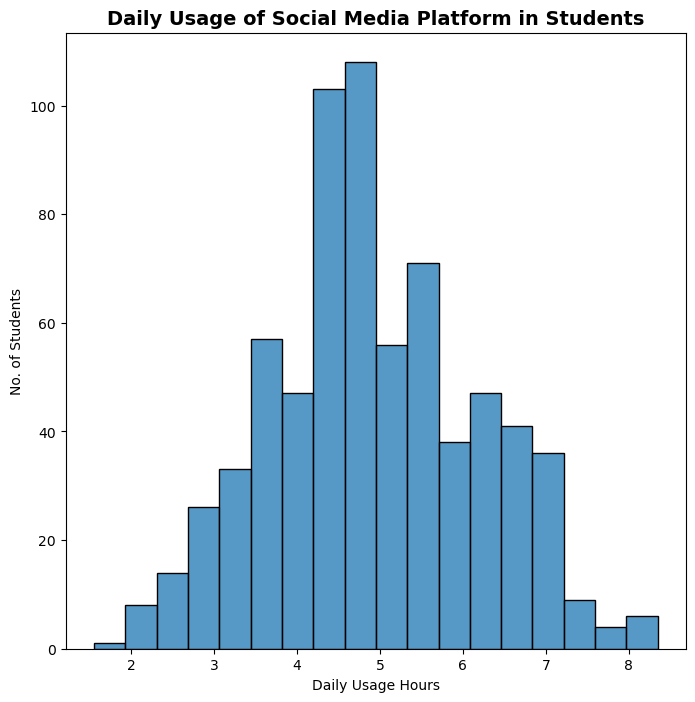

In [53]:
plt.figure(figsize=(8,8))
sns.histplot(data=df2, x='Avg_Daily_Usage_Hours')
plt.title('Daily Usage of Social Media Platform in Students',fontsize=14, fontweight='bold')
plt.xlabel('Daily Usage Hours')
plt.ylabel('No. of Students')
plt.show()

Text(0, 0.5, 'No. of Students')

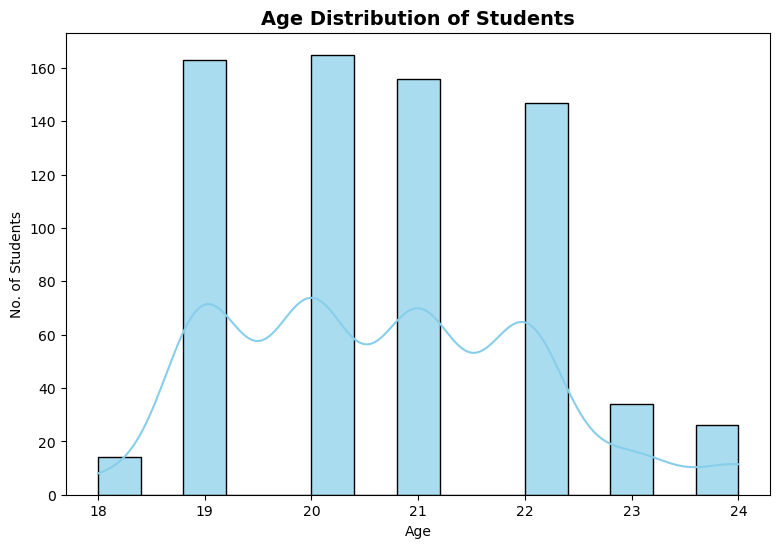

In [54]:
#age distribution analysis

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(df2['Age'], bins=15, kde=True, color='skyblue', alpha=0.7)
plt.title('Age Distribution of Students', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('No. of Students')

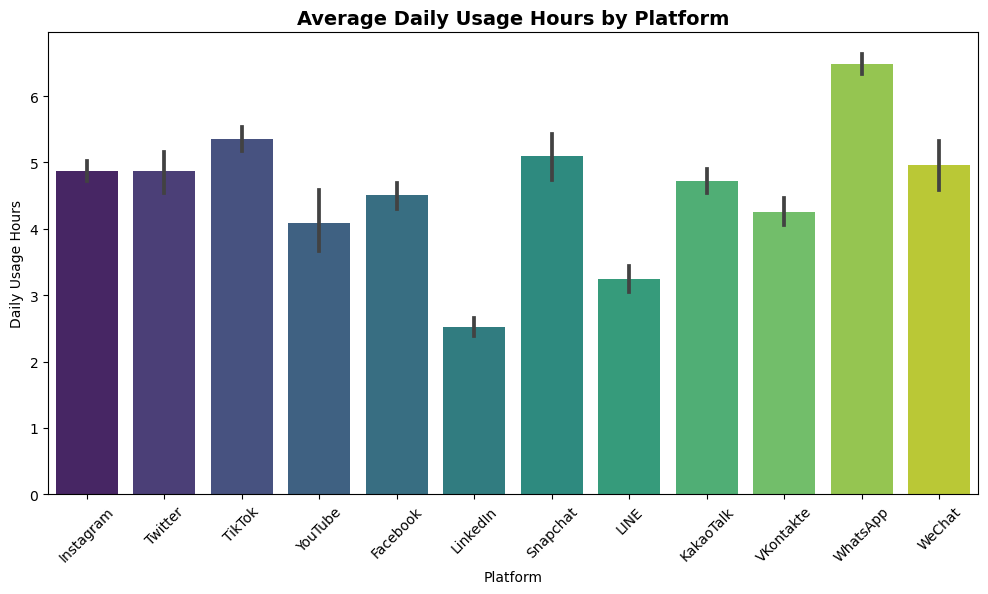

In [56]:
# What is the correlation between the usage of social media and the platform on which it is used?
plt.figure(figsize=(12,6))
sns.barplot(x='Most_Used_Platform', y='Avg_Daily_Usage_Hours', data=df2, palette="viridis")
plt.title('Average Daily Usage Hours by Platform', fontsize=14, fontweight='bold')
plt.xlabel('Platform')
plt.ylabel('Daily Usage Hours')
plt.xticks(rotation=45)
plt.show()

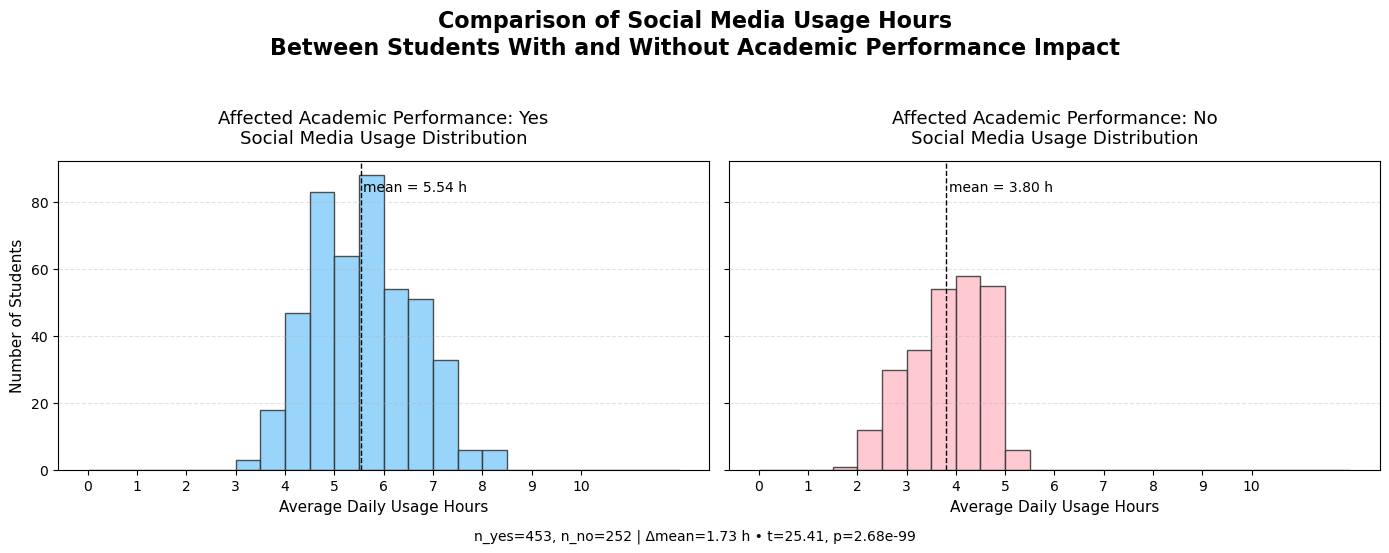

In [67]:
# split data
yes = df2.loc[df2["Affects_Academic_Performance"]=="Yes","Avg_Daily_Usage_Hours"]
no  = df2.loc[df2["Affects_Academic_Performance"]=="No","Avg_Daily_Usage_Hours"]

# figure + shared axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5), sharex=True, sharey=True)

# consistent bins
bins = np.arange(0, 12.5, 0.5)
yes_color ='lightskyblue'     
no_color  = 'pink'    
edge      = "#333333"

# left: YES
ax1.hist(yes, bins=bins, color=yes_color, alpha=0.85, edgecolor=edge, linewidth=1.0)
m1 = yes.mean()
ax1.axvline(m1, ls="--", color="black", lw=1)
ax1.text(m1+0.05, ax1.get_ylim()[1]*0.9, f"mean = {m1:.2f} h", fontsize=10)
ax1.set_title(
    "Affected Academic Performance: Yes\nSocial Media Usage Distribution",
    fontsize=13, pad=12
)
ax1.set_xlabel("Average Daily Usage Hours", fontsize=11)
ax1.set_ylabel("Number of Students", fontsize=11)
ax1.set_xticks(range(0, 11))
ax1.grid(axis="y", linestyle="--", alpha=0.35)

# right: NO
ax2.hist(no, bins=bins, color=no_color, alpha=0.85, edgecolor=edge, linewidth=1.0)
m2 = no.mean()
ax2.axvline(m2, ls="--", color="black", lw=1)
ax2.text(m2+0.05, ax2.get_ylim()[1]*0.9, f"mean = {m2:.2f} h", fontsize=10)
ax2.set_title(
    "Affected Academic Performance: No\nSocial Media Usage Distribution",
    fontsize=13, pad=12
)
ax2.set_xlabel("Average Daily Usage Hours", fontsize=11)
ax2.set_xticks(range(0, 11))
ax2.grid(axis="y", linestyle="--", alpha=0.35)

# big two-line title at the top (like your screenshot)
fig.suptitle(
    "Comparison of Social Media Usage Hours\n"
    "Between Students With and Without Academic Performance Impact",
    fontsize=16, fontweight="bold", y=1.04
)

# (optional) add quick stats line at the bottom
t, p = stats.ttest_ind(yes, no, equal_var=False)
fig.text(
    0.5, -0.02,
    f"n_yes={len(yes)}, n_no={len(no)} | Δmean={m1-m2:.2f} h • t={t:.2f}, p={p:.2e}",
    ha="center", fontsize=10
)

plt.tight_layout()
plt.show()


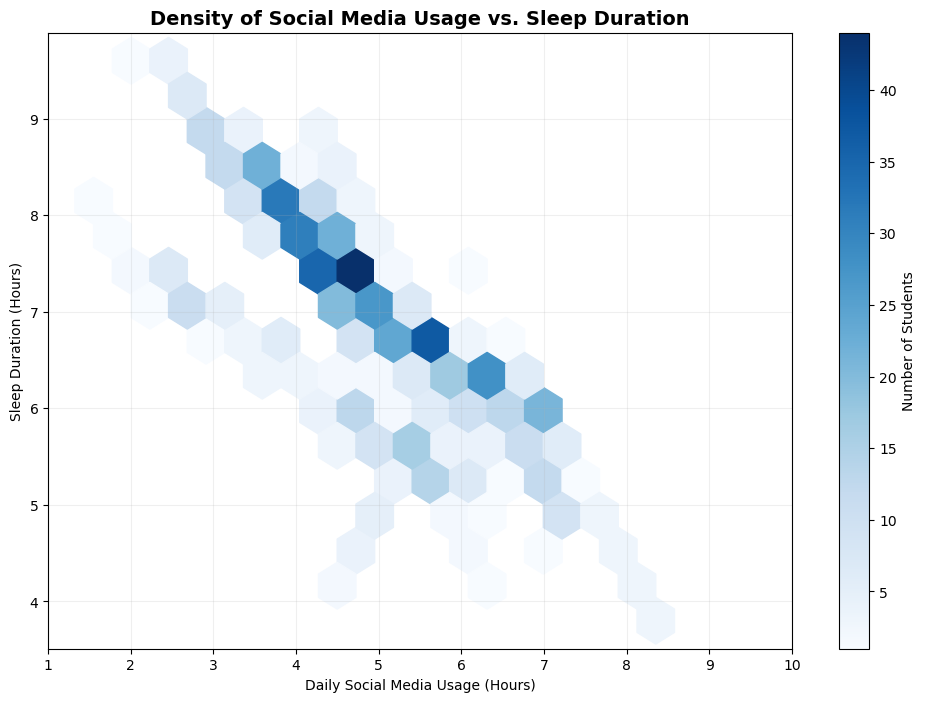

In [72]:
plt.figure(figsize=(12, 8))
hexbin = plt.hexbin(
    x=df2['Avg_Daily_Usage_Hours'], 
    y=df2['Sleep_Hours_Per_Night'],
    gridsize=15,
    cmap='Blues',
    mincnt=1
)
plt.colorbar(hexbin, label='Number of Students')
plt.title('Density of Social Media Usage vs. Sleep Duration',fontsize=14, fontweight='bold')
plt.xlabel('Daily Social Media Usage (Hours)')
plt.ylabel('Sleep Duration (Hours)')
plt.xticks(range(1, 11))
plt.grid(alpha=0.2)
plt.show()


<Axes: title={'center': 'HeatMap showing Gender by Most Used Social Media Platform distribution'}, xlabel='Most_Used_Platform', ylabel='Gender'>

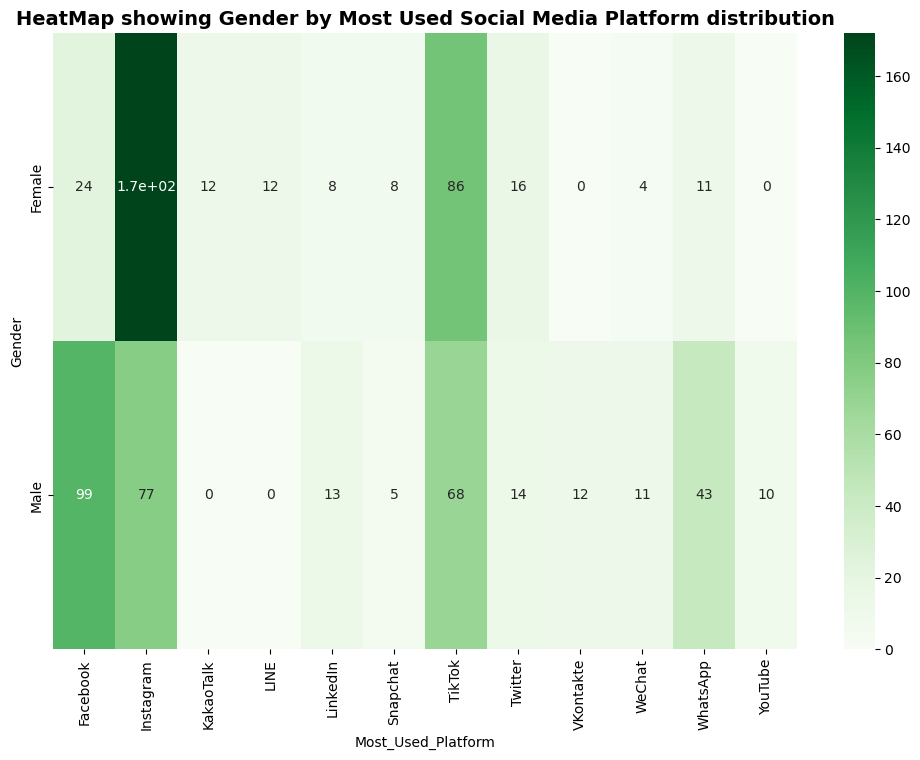

In [76]:
# Which platforms were most used by given genders?

plt.figure(figsize=(12, 8))
plt.title('HeatMap showing Gender by Most Used Social Media Platform distribution',fontsize=14, fontweight='bold')
crosstab = pd.crosstab(df2['Gender'], df2['Most_Used_Platform'])
sns.heatmap(crosstab, annot=True, cmap='Greens')

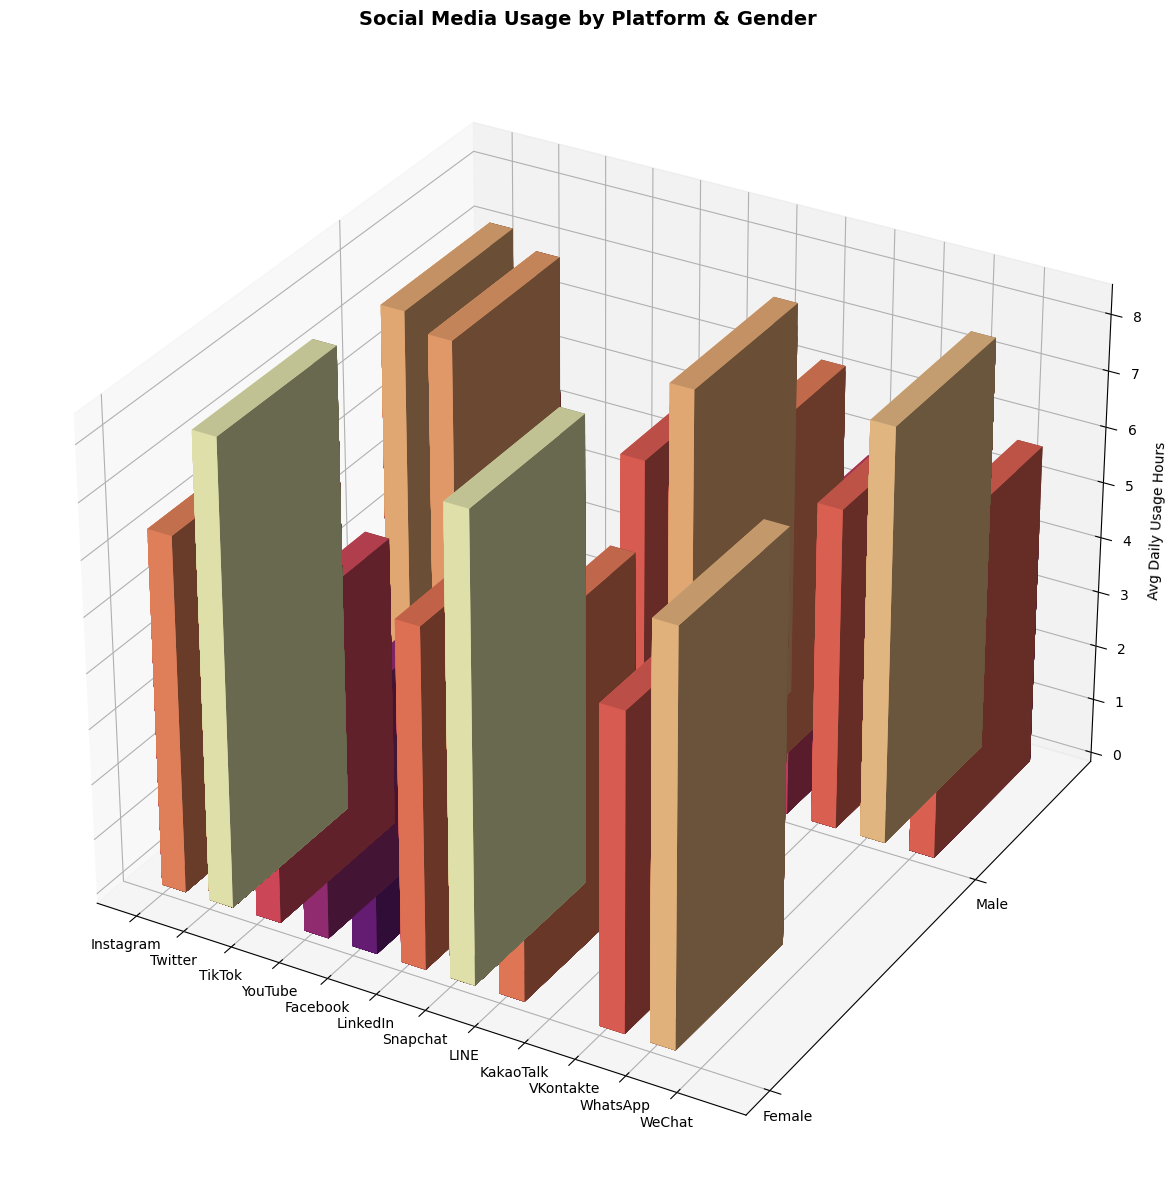

In [77]:
# What is the Social Media Usage depending on factors like Platform & Gender?¶
platforms = df2['Most_Used_Platform'].unique()
genders = df2['Gender'].unique()
df2['Platform_Code'] = df2['Most_Used_Platform'].astype('category').cat.codes
df2['Gender_Code'] = df2['Gender'].astype('category').cat.codes

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df2)):
    ax.bar3d(
        x=df2['Platform_Code'][i], 
        y=df2['Gender_Code'][i],
        z=0,
        dx=0.5,  
        dy=0.5,  
        dz=df2['Avg_Daily_Usage_Hours'][i],  
        color=plt.cm.magma(df2['Avg_Daily_Usage_Hours'][i]/df2['Avg_Daily_Usage_Hours'].max()))
ax.set_xticks(range(len(platforms)))
ax.set_xticklabels(platforms)
ax.set_yticks(range(len(genders)))
ax.set_yticklabels(genders)
ax.set_zlabel('Avg Daily Usage Hours')
ax.set_title('Social Media Usage by Platform & Gender',fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [81]:
# What are the social media usage patterns across different countries?
fig = px.choropleth(
    df2, 
    locations="Country",           
    color="Avg_Daily_Usage_Hours",             
    hover_name="Country",
    locationmode='country names', 
    color_continuous_scale="Blues",
    title="social media usage patterns across different countries"
)
fig.update_layout(
    width=1500,    # Width in pixels
    height=1000,    # Height in pixels
    geo=dict(showframe=False, showcoastlines=True)
)
fig.show()


(array([0, 1, 2]),
 [Text(0, 0, 'Undergraduate'),
  Text(1, 0, 'Graduate'),
  Text(2, 0, 'High School')])

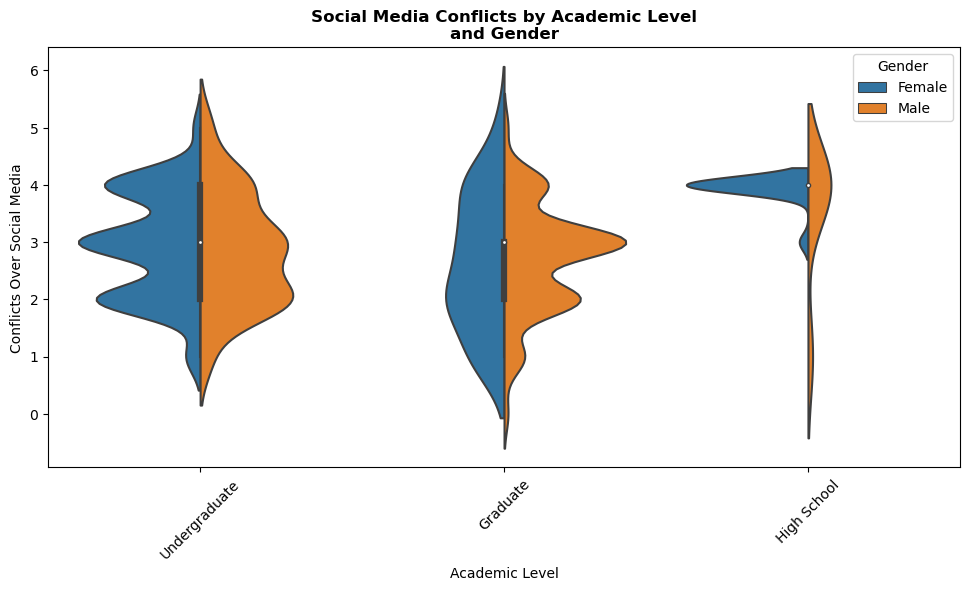

In [82]:
# What about the social media conflicts of Students by Academic Level and their Genders?

#Social Media Conflicts by Academic Level and Gender
plt.figure(figsize=(40, 12))
plt.subplot(2, 3, 2)
sns.violinplot(data=df2, x='Academic_Level', y='Conflicts_Over_Social_Media', 
               hue='Gender', split=True)
plt.title('Social Media Conflicts by Academic Level\nand Gender', fontweight='bold')
plt.xlabel('Academic Level')
plt.ylabel('Conflicts Over Social Media')
plt.xticks(rotation=45)

In [ ]:
#. STATISTICAL ANALYSIS
#  HYPOTHETICAL ANALYSIS


In [ ]:
# Do students with high usage have different mental health scores?

In [83]:
# Hypothesis Test

# Split data based on median usage hours
median_usage = df2['Avg_Daily_Usage_Hours'].median()
high_usage = df2[df2['Avg_Daily_Usage_Hours'] > median_usage]
low_usage = df2[df2['Avg_Daily_Usage_Hours'] <= median_usage]

# Perform t-test
t_stat, p_value = stats.ttest_ind(high_usage['Mental_Health_Score'], 
                                  low_usage['Mental_Health_Score'])

print("HYPOTHESIS TEST : Usage Hours vs Mental Health")
print("="*60)
print(f"High Usage Group (>{median_usage:.1f}h): {len(high_usage)} students")
print(f"Low Usage Group (≤{median_usage:.1f}h): {len(low_usage)} students")
print(f"\nMean Mental Health Scores:")
print(f"High Usage: {high_usage['Mental_Health_Score'].mean():.2f}")
print(f"Low Usage: {low_usage['Mental_Health_Score'].mean():.2f}")
print(f"\nt-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")


HYPOTHESIS TEST : Usage Hours vs Mental Health
High Usage Group (>4.8h): 328 students
Low Usage Group (≤4.8h): 377 students

Mean Mental Health Scores:
High Usage: 5.41
Low Usage: 6.93

t-statistic: -25.008
p-value: 0.000
Significant difference: Yes (α = 0.05)


HYPOTHESIS TEST : Addiction Level vs Academic Performance
Contingency Table:
 Affects_Academic_Performance   No  Yes
Addiction_Level                       
Low                            17    0
Moderate                      235   45
High                            0  408

Chi-square statistic: 540.562
p-value: 4.154e-118
Degrees of freedom: 2
Significant association: Yes (α = 0.05)


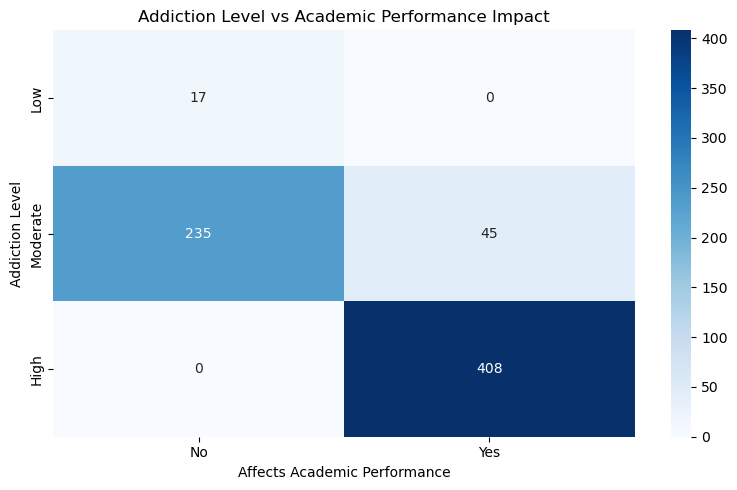

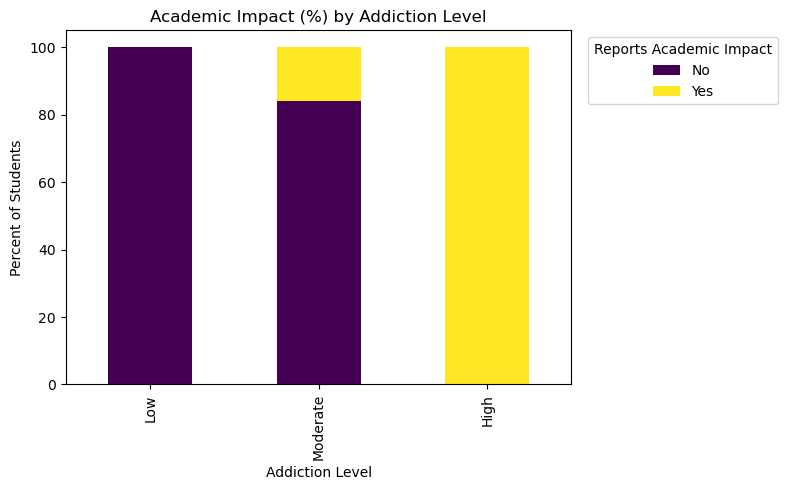

In [90]:
# 1) Make sure Addiction_Level exists (Low / Moderate / High)
if 'Addiction_Level' not in df2.columns:
    def categorize_addiction(score):
        if score <= 3:  return 'Low'
        elif score <= 6: return 'Moderate'
        else:            return 'High'
    df2['Addiction_Level'] = df2['Addicted_Score'].apply(categorize_addiction)

# enforce an ordered categorical for nicer tables/plots
order = ['Low','Moderate','High']
df2['Addiction_Level'] = pd.Categorical(df2['Addiction_Level'], categories=order, ordered=True)

# 2) Chi-square: Addiction level vs Academic performance
contingency = pd.crosstab(df2['Addiction_Level'], df2['Affects_Academic_Performance'])
chi2, p_value, dof, expected = chi2_contingency(contingency)

print("HYPOTHESIS TEST : Addiction Level vs Academic Performance")
print("="*60)
print("Contingency Table:\n", contingency)
print(f"\nChi-square statistic: {chi2:.3f}")
print(f"p-value: {p_value:.3e}")
print(f"Degrees of freedom: {dof}")
print(f"Significant association: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")

# 3a) Heatmap of counts
plt.figure(figsize=(8,5))
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
plt.title('Addiction Level vs Academic Performance Impact')
plt.ylabel('Addiction Level')
plt.xlabel('Affects Academic Performance')
plt.tight_layout()
plt.show()

# 3b) Stacked percentages (nice for storytelling)
pct = (contingency.div(contingency.sum(axis=1), axis=0) * 100)[['No','Yes']]
ax = pct.plot(kind='bar', stacked=True, figsize=(8,5), colormap='viridis')
ax.set_title('Academic Impact (%) by Addiction Level')
ax.set_xlabel('Addiction Level')
ax.set_ylabel('Percent of Students')
ax.legend(title='Reports Academic Impact', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()


In [91]:
## PLATFORM ANALYSIS 
# ANOVA Test: Platform vs Addiction Score

# Get addiction scores for each platform
platforms = df2['Most_Used_Platform'].unique()
platform_scores = []
platform_names = []

for platform in platforms:
    scores = df2[df2['Most_Used_Platform'] == platform]['Addicted_Score']
    if len(scores) >= 5:  # Only include platforms with sufficient data
        platform_scores.append(scores)
        platform_names.append(platform)

# Perform ANOVA
f_stat, p_value = f_oneway(*platform_scores)

print("HYPOTHESIS TEST : Platform vs Addiction Severity (ANOVA)")
print("="*60)
print("Mean Addiction Scores by Platform:")
for platform in platform_names:
    mean_score = df2[df2['Most_Used_Platform'] == platform]['Addicted_Score'].mean()
    count = len(df2[df2['Most_Used_Platform'] == platform])
    print(f"{platform}: {mean_score:.2f} (n={count})")

print(f"\nF-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Significant difference between platforms: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")

HYPOTHESIS TEST : Platform vs Addiction Severity (ANOVA)
Mean Addiction Scores by Platform:
Instagram: 6.55 (n=249)
Twitter: 5.50 (n=30)
TikTok: 7.43 (n=154)
YouTube: 6.10 (n=10)
Facebook: 5.67 (n=123)
LinkedIn: 3.81 (n=21)
Snapchat: 7.46 (n=13)
LINE: 3.00 (n=12)
KakaoTalk: 6.00 (n=12)
VKontakte: 5.00 (n=12)
WhatsApp: 7.46 (n=54)
WeChat: 6.07 (n=15)

F-statistic: 35.717
p-value: 0.000
Significant difference between platforms: Yes (α = 0.05)


CORRELATION ANALYSIS: Sleep vs Usage Hours
Pearson Correlation: -0.791
Pearson p-value: 0.000
Spearman Correlation: -0.814
Spearman p-value: 0.000

Interpretation: moderate negative correlation
Significant correlation: Yes (α = 0.05)


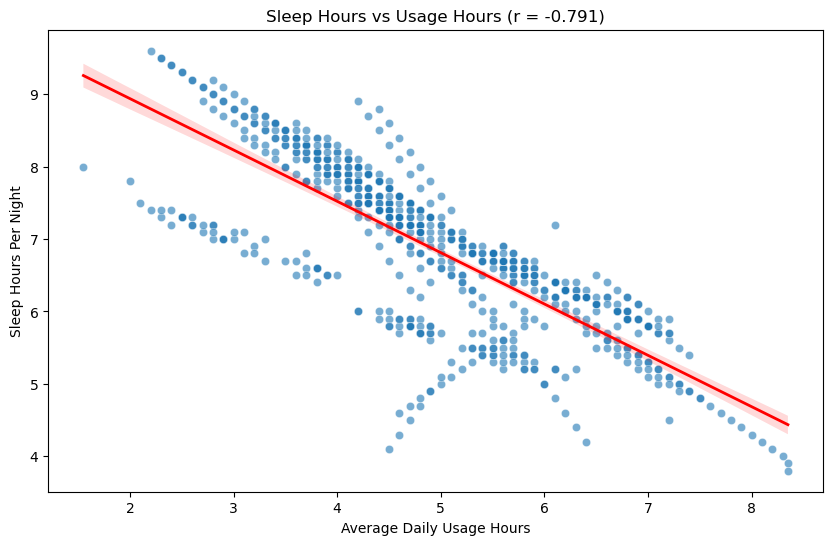

In [93]:
## CORRELATION ANALYSIS 

# Correlation Test: Sleep Hours vs Usage Hours

# Pearson correlation
pearson_corr, pearson_p = pearsonr(df2['Sleep_Hours_Per_Night'], df2['Avg_Daily_Usage_Hours'])

# Spearman correlation (non-parametric)
spearman_corr, spearman_p = spearmanr(df2['Sleep_Hours_Per_Night'], df2['Avg_Daily_Usage_Hours'])

print("CORRELATION ANALYSIS: Sleep vs Usage Hours")
print("="*50)
print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"Pearson p-value: {pearson_p:.3f}")
print(f"Spearman Correlation: {spearman_corr:.3f}")
print(f"Spearman p-value: {spearman_p:.3f}")

# Interpretation
if abs(pearson_corr) < 0.6:
    strength = "weak"
elif abs(pearson_corr) < 0.9:
    strength = "moderate"
else:
    strength = "strong"

direction = "negative" if pearson_corr < 0 else "positive"
print(f"\nInterpretation: {strength} {direction} correlation")
print(f"Significant correlation: {'Yes' if pearson_p < 0.05 else 'No'} (α = 0.05)")

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', alpha=0.6)
sns.regplot(data=df2, x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', 
            scatter=False, color='red', line_kws={'linewidth': 2})
plt.title(f'Sleep Hours vs Usage Hours (r = {pearson_corr:.3f})')
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Sleep Hours Per Night')
plt.show()

In [94]:
## KEY INSIGHTS AND FINDINGS

# GLOBAL USAGE PATTERNS
# Summary of global patterns from your analysis
print("GLOBAL SOCIAL MEDIA USAGE PATTERNS")
print("="*50)

# Top countries by representation
top_countries = df2['Country'].value_counts().head(10)
print("Top 10 Countries by Student Representation:")
for country, count in top_countries.items():
    avg_usage = df2[df2['Country'] == country]['Avg_Daily_Usage_Hours'].mean()
    avg_addiction = df2[df2['Country'] == country]['Addicted_Score'].mean()
    print(f"{country}: {count} students, {avg_usage:.1f}h avg usage, {avg_addiction:.1f} addiction score")

# Regional insights
print(f"\nGlobal Statistics:")
print(f"Total Countries Represented: {df2['Country'].nunique()}")
print(f"Average Daily Usage Worldwide: {df2['Avg_Daily_Usage_Hours'].mean():.2f} hours")
print(f"Countries with Highest Usage (>5h): {len(df2.groupby('Country')['Avg_Daily_Usage_Hours'].mean()[df2.groupby('Country')['Avg_Daily_Usage_Hours'].mean() > 5])}")

GLOBAL SOCIAL MEDIA USAGE PATTERNS
Top 10 Countries by Student Representation:
India: 53 students, 6.1h avg usage, 7.5 addiction score
USA: 40 students, 6.9h avg usage, 8.6 addiction score
Canada: 34 students, 4.7h avg usage, 6.7 addiction score
Denmark: 27 students, 3.6h avg usage, 4.3 addiction score
Ireland: 27 students, 4.6h avg usage, 6.4 addiction score
Turkey: 27 students, 5.3h avg usage, 7.3 addiction score
Mexico: 27 students, 6.4h avg usage, 7.4 addiction score
Spain: 27 students, 5.0h avg usage, 7.3 addiction score
France: 27 students, 4.1h avg usage, 5.1 addiction score
Switzerland: 27 students, 3.4h avg usage, 4.3 addiction score

Global Statistics:
Total Countries Represented: 110
Average Daily Usage Worldwide: 4.92 hours
Countries with Highest Usage (>5h): 39


In [95]:
# PLATFORM ANALYSIS INSIGHTS

# Platform insights
print("PLATFORM DOMINANCE AND ADDICTION PATTERNS")
print("="*50)

platform_stats = df2.groupby('Most_Used_Platform').agg({
    'Addicted_Score': ['mean', 'count'],
    'Avg_Daily_Usage_Hours': 'mean',
    'Mental_Health_Score': 'mean'
}).round(2)

platform_stats.columns = ['Avg_Addiction_Score', 'User_Count', 'Avg_Usage_Hours', 'Avg_Mental_Health']
platform_stats = platform_stats.sort_values('Avg_Addiction_Score', ascending=False)

print("Platform Rankings by Addiction Potential:")
print(platform_stats)

# Most addictive platform
most_addictive = platform_stats.index[0]
least_addictive = platform_stats.index[-1]

print(f"\nKey Findings:")
print(f"Most Addictive Platform: {most_addictive}")
print(f"Least Addictive Platform: {least_addictive}")
print(f"Most Popular Platform: {df2['Most_Used_Platform'].mode()[0]}")

PLATFORM DOMINANCE AND ADDICTION PATTERNS
Platform Rankings by Addiction Potential:
                    Avg_Addiction_Score  User_Count  Avg_Usage_Hours  \
Most_Used_Platform                                                     
Snapchat                           7.46          13             5.09   
WhatsApp                           7.46          54             6.48   
TikTok                             7.43         154             5.35   
Instagram                          6.55         249             4.87   
YouTube                            6.10          10             4.08   
WeChat                             6.07          15             4.96   
KakaoTalk                          6.00          12             4.73   
Facebook                           5.67         123             4.51   
Twitter                            5.50          30             4.87   
VKontakte                          5.00          12             4.25   
LinkedIn                           3.81          21 

In [96]:
# RISK FACTOR IDENTIFICATION 

# Identifing high-risk student profiles
print("HIGH-RISK STUDENT PROFILE ANALYSIS")
print("="*50)

# Defining high-risk criteria
high_risk = df2[
    (df2['Avg_Daily_Usage_Hours'] > df2['Avg_Daily_Usage_Hours'].quantile(0.75)) &
    (df2['Addicted_Score'] > 6) &
    (df2['Mental_Health_Score'] < df2['Mental_Health_Score'].quantile(0.25))
]

print(f"High-Risk Students Identified: {len(high_risk)} out of {len(df2)} ({len(high_risk)/len(df2)*100:.1f}%)")

if len(high_risk) > 0:
    print(f"\nHigh-Risk Profile Characteristics:")
    print(f"Average Usage Hours: {high_risk['Avg_Daily_Usage_Hours'].mean():.2f}")
    print(f"Average Addiction Score: {high_risk['Addicted_Score'].mean():.2f}")
    print(f"Average Mental Health Score: {high_risk['Mental_Health_Score'].mean():.2f}")
    print(f"Average Sleep Hours: {high_risk['Sleep_Hours_Per_Night'].mean():.2f}")
    
    print(f"\nDemographic Breakdown:")
    print(f"Gender Distribution:\n{high_risk['Gender'].value_counts()}")
    print(f"\nAcademic Level Distribution:\n{high_risk['Academic_Level'].value_counts()}")
    print(f"\nTop Risk Countries:\n{high_risk['Country'].value_counts().head()}")

# Academic performance impact
academic_impact = df2[df2['Affects_Academic_Performance'] == 'Yes']
print(f"\nAcademic Performance Impact:")
print(f"Students reporting academic impact: {len(academic_impact)} ({len(academic_impact)/len(df2)*100:.1f}%)")
print(f"Average usage hours (academic impact): {academic_impact['Avg_Daily_Usage_Hours'].mean():.2f}")
print(f"Average usage hours (no academic impact): {df2[df2['Affects_Academic_Performance'] == 'No']['Avg_Daily_Usage_Hours'].mean():.2f}")

HIGH-RISK STUDENT PROFILE ANALYSIS
High-Risk Students Identified: 29 out of 705 (4.1%)

High-Risk Profile Characteristics:
Average Usage Hours: 6.87
Average Addiction Score: 8.97
Average Mental Health Score: 4.00
Average Sleep Hours: 5.63

Demographic Breakdown:
Gender Distribution:
Gender
Female    21
Male       8
Name: count, dtype: int64

Academic Level Distribution:
Academic_Level
Undergraduate    22
Graduate          6
High School       1
Name: count, dtype: int64

Top Risk Countries:
Country
USA               12
India              8
Russia             7
Australia          1
Czech Republic     1
Name: count, dtype: int64

Academic Performance Impact:
Students reporting academic impact: 453 (64.3%)
Average usage hours (academic impact): 5.54
Average usage hours (no academic impact): 3.80


In [97]:
# KEY CORRELATIONS AND RELATIONSHIPS¶
# Summary of key correlations discovered
print("KEY CORRELATIONS AND RELATIONSHIPS")
print("="*50)

# Calculating key correlations
correlations = {
    'Usage vs Mental Health': df2['Avg_Daily_Usage_Hours'].corr(df2['Mental_Health_Score']),
    'Usage vs Sleep': df2['Avg_Daily_Usage_Hours'].corr(df2['Sleep_Hours_Per_Night']),
    'Addiction vs Mental Health': df2['Addicted_Score'].corr(df2['Mental_Health_Score']),
    'Addiction vs Sleep': df2['Addicted_Score'].corr(df2['Sleep_Hours_Per_Night']),
    'Usage vs Conflicts': df2['Avg_Daily_Usage_Hours'].corr(df2['Conflicts_Over_Social_Media']),
    'Mental Health vs Sleep': df2['Mental_Health_Score'].corr(df2['Sleep_Hours_Per_Night'])
}

print("Correlation Strength Analysis:")
for relationship, corr_value in correlations.items():
    if abs(corr_value) < 0.6:
        strength = "Weak"
    elif abs(corr_value) < 0.9:
        strength = "Moderate"
    else:
        strength = "Strong"
    
    direction = "Negative" if corr_value < 0 else "Positive"
    print(f"{relationship}: {corr_value:.3f} ({strength} {direction})")

# Strongest relationships
strongest_positive = max(correlations.items(), key=lambda x: x[1] if x[1] > 0 else -1)
strongest_negative = min(correlations.items(), key=lambda x: x[1] if x[1] < 0 else 1)

print(f"\nStrongest Positive Relationship: {strongest_positive[0]} (r = {strongest_positive[1]:.3f})")
print(f"Strongest Negative Relationship: {strongest_negative[0]} (r = {strongest_negative[1]:.3f})")

KEY CORRELATIONS AND RELATIONSHIPS
Correlation Strength Analysis:
Usage vs Mental Health: -0.801 (Moderate Negative)
Usage vs Sleep: -0.791 (Moderate Negative)
Addiction vs Mental Health: -0.945 (Strong Negative)
Addiction vs Sleep: -0.765 (Moderate Negative)
Usage vs Conflicts: 0.805 (Moderate Positive)
Mental Health vs Sleep: 0.707 (Moderate Positive)

Strongest Positive Relationship: Usage vs Conflicts (r = 0.805)
Strongest Negative Relationship: Addiction vs Mental Health (r = -0.945)


In [98]:
# DEMOGRAPHICS AND BEHAVORIAL INSIGHTS¶
# Demographic insights
print("DEMOGRAPHIC AND BEHAVIORAL INSIGHTS")
print("="*50)

# Age group analysis
df2['Age_Group'] = pd.cut(df2['Age'], bins=[17, 20, 22, 25], labels=['18-20', '21-22', '23-25'], right=True, include_lowest=True)
age_analysis = df2.groupby('Age_Group', observed=True).agg({
    'Avg_Daily_Usage_Hours': 'mean',
    'Addicted_Score': 'mean',
    'Mental_Health_Score': 'mean'
}).round(2)

print("Usage Patterns by Age Group:")
print(age_analysis)

# Academic level insights
academic_analysis = df2.groupby('Academic_Level', observed=True).agg({
    'Avg_Daily_Usage_Hours': 'mean',
    'Addicted_Score': 'mean',
    'Age': 'count' 
}).round(2)
academic_analysis.columns = ['Avg_Usage_Hours', 'Avg_Addiction_Score', 'Count']

print(f"\nUsage Patterns by Academic Level:")
print(academic_analysis)

# Sleep impact analysis
sleep_categories = pd.cut(df2['Sleep_Hours_Per_Night'], 
                         bins=[0, 6, 8, 12], 
                         labels=['Poor (<6h)', 'Normal (6-8h)', 'Good (>8h)'],
                         right=False, include_lowest=True)
df2['Sleep_Category'] = sleep_categories

sleep_analysis = df2.groupby('Sleep_Category', observed=True).agg({
    'Avg_Daily_Usage_Hours': 'mean',
    'Addicted_Score': 'mean',
    'Mental_Health_Score': 'mean',
    'Age': 'count' 
}).round(2)

print(f"\nSocial Media Usage by Sleep Quality:")
print(sleep_analysis)

# Gender differences summary
gender_summary = df2.groupby('Gender', observed=True).agg({
    'Avg_Daily_Usage_Hours': 'mean',
    'Addicted_Score': 'mean',
    'Mental_Health_Score': 'mean',
    'Sleep_Hours_Per_Night': 'mean'
}).round(2)

print(f"\nGender Differences Summary:")
print(gender_summary)

DEMOGRAPHIC AND BEHAVIORAL INSIGHTS
Usage Patterns by Age Group:
           Avg_Daily_Usage_Hours  Addicted_Score  Mental_Health_Score
Age_Group                                                            
18-20                       5.04            6.61                 6.10
21-22                       4.82            6.35                 6.31
23-25                       4.74            5.87                 6.52

Usage Patterns by Academic Level:
                Avg_Usage_Hours  Avg_Addiction_Score  Count
Academic_Level                                             
Graduate                   4.78                 6.24    325
High School                5.54                 8.04     27
Undergraduate              5.00                 6.49    353

Social Media Usage by Sleep Quality:
                Avg_Daily_Usage_Hours  Addicted_Score  Mental_Health_Score  \
Sleep_Category                                                               
Poor (<6h)                       6.11            8.02   